# A Brief Introduction to NumPy
### "...the fundamental package for scientific computing with Python." - numpy.org

In this notebook, we will cover the basics of NumPy, a package that is the basis for many other libraries in the data science ecosystem. Let's get started.

In [1]:
import numpy as np
from IPython.display import Image
import time
from sys import getsizeof
import matplotlib.pyplot as plt

# 1. NumPy Arrays
The array data structure is the backbone of the NumPy library. They can be single-dimensional (vectors), two-dimensional (matrices), or multi-dimensional for more complex tasks.

In many ways, they are similar to Python lists.

In [3]:
a = ['a', 'b', 'c', 'd', 'e', 'f']
b = np.array(['a', 'b', 'c', 'd', 'e', 'f'])

# Accessible by index
print(b[0])

# Sliceable
print(b[1:3])

# Iterable
for letter in b:
    print(letter)

a
['b' 'c']
a
b
c
d
e
f


So why use NumPy arrays at all? One word: performance! Generally speaking, Python lists take up more space and require more computation than NumPy arrays. Let's take a look at the size differences.

In [5]:
n_elements = 1_000_000
# Create using list comprehension
python_list = [x for x in range(n_elements)]
print(getsizeof(python_list))

# Create with existing python list
np_arr = np.array(python_list)
print(getsizeof(np_arr))

8697456
8000096


Now let's look at the speed differences.

In [6]:
start = time.process_time()
# Add 100 to every element in the Python list
python_list_mod = [x + 100 for x in python_list]
python_time = time.process_time() - start
print(python_time)

# Add 100 to every element in the Numpy array
start = time.process_time()
np_arr_mod = np_arr + 100
np_time = time.process_time() - start
print(np_time)

0.07268199999999991
0.004588999999999954


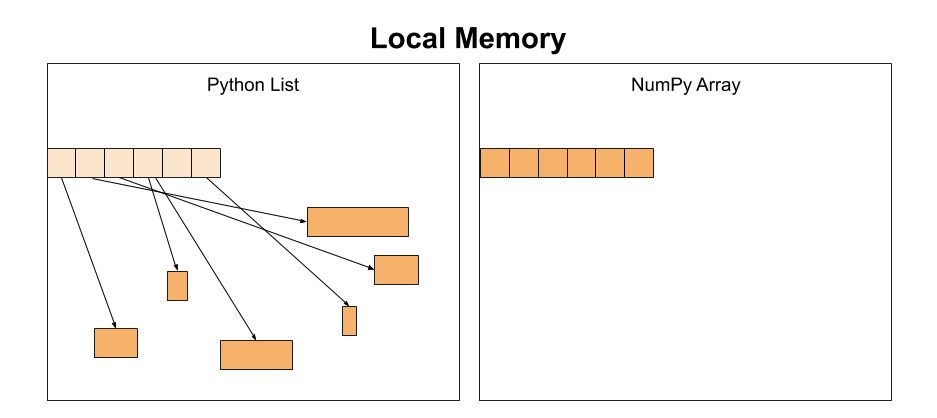

In [7]:
Image('python_memory1.png')

If NumPy arrays are more efficient computationally and in regards to space, why not use them all the time? There are some constraints, most notably, all of their items must be of the same type. [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array)

In [8]:
python_list = [1, 'a', 0.222, 'hello from inside the list!']
np_arr = np.array(python_list)
print(python_list)
print(np_arr)

[1, 'a', 0.222, 'hello from inside the list!']
['1' 'a' '0.222' 'hello from inside the list!']


# 1.1 Creating
NumPy arrays are created with existing data (standard python lists or lists of lists) or by using a collection of built-in methods.

## 1.1.1 Existing Data

### .array()
Use python lists (or lists of lists) as input.

In [2]:
std_list = [1, 2, 3, 4, 5]
np.array(std_list)

array([1, 2, 3, 4, 5])

In [3]:
std_matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np.array(std_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Note: the .array() method is a convenience function for constructing objects of the class ndarray. While it is possible to call .ndarray() directly, it is specifically regarded as an anti-pattern by the NumPy documentation.

## 1.1.2 Fixed Values

### .zeros(), .ones()
Return a new array of given shape and type, filled with zeros or ones.

In [4]:
np.zeros(3)

array([0., 0., 0.])

In [5]:
np.ones(17)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
# Notice the shape represented as a tuple
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Note: the numbers have periods after them to indicate that these are floating point numbers.

### .full()
Return a new array of given shape and type, filled with fill_value.

In [10]:
np.full((4,4), 72)

array([[72, 72, 72, 72],
       [72, 72, 72, 72],
       [72, 72, 72, 72],
       [72, 72, 72, 72]])

## 1.1.3 Range

### .arange()
Return evenly spaced values within a given interval. Notice that the output is inclusive of the first number parameter and exclusive of the second.

In [10]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [12]:
np.arange(0,20,5)

array([ 0,  5, 10, 15])

### .linspace()
Return evenly spaced numbers over a specified interval. Notice that the output is inclusive of both the first and second number parameters.

In [13]:
np.linspace(0,20,5)

array([ 0.,  5., 10., 15., 20.])

In [14]:
np.linspace(0,1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Note: the main difference between .linspace() and .arange() is that with .linspace() you have precise control over the end value, whereas with .arange() you can specify the increments explicitly.

### .logspace()
Return numbers spaced evenly on a log scale.

In [15]:
np.logspace(2.0, 3.0, num=4)

array([ 100.        ,  215.443469  ,  464.15888336, 1000.        ])

In [25]:
np.logspace(2.0, 3.0, num=4, base=2.0)

array([4.        , 5.0396842 , 6.34960421, 8.        ])

## 1.1.4 Random

### .rand()
Create an array of the given shape and populate it with random samples from a uniform distribution over 0,1.

In [27]:
np.random.rand()

0.7125801811390514

In [18]:
np.random.rand(4)

array([0.91155984, 0.98323076, 0.60797164, 0.48538736])

In [19]:
np.random.rand(7,3)

array([[0.56443505, 0.13692564, 0.4367128 ],
       [0.66786468, 0.86782966, 0.88696338],
       [0.05537221, 0.54016645, 0.9654299 ],
       [0.19105141, 0.63037385, 0.51600478],
       [0.53737417, 0.76494641, 0.61205375],
       [0.09621612, 0.37848038, 0.60698676],
       [0.47772402, 0.61733058, 0.75352393]])

### .randn()
Return a sample (or samples) from the “standard normal” distribution.

In [39]:
np.random.randn()

0.36910179629879897

In [46]:
np.random.randn(5)

array([-0.08320502, -0.69825957,  0.80139519,  0.53540454,  0.78953503])

Note: .rand() is from a uniform distribution, whereas .randn() is from the standard **normal** distribution.

In [55]:
np.random.randn(3, 5)

array([[ 1.33667905,  0.46529544,  1.51069451,  0.69167808,  1.60270943],
       [ 1.62614154, -0.10463841, -0.999014  , -0.70942201, -0.15136812],
       [-0.70328834, -0.48982338,  2.03118893,  2.32867839,  2.08885297]])

### .randint()
Return random integers from low (inclusive) to high (exclusive).

In [3]:
np.random.randint(0,10)

5

In [66]:
np.random.randint(0,10,size=7)

array([4, 5, 5, 6, 1, 2, 1])

In [67]:
np.random.randint(0,10,size=(3,2))

array([[9, 3],
       [6, 8],
       [7, 6]])

## 1.2 Attributes and Methods

In [82]:
arr = np.random.randint(0,10,size=(2,7))
arr

array([[2, 0, 8, 7, 8, 4, 6],
       [3, 5, 6, 6, 7, 6, 2]])

### .shape
Tuple of array dimensions. Note: this is an attribute NOT a method.

In [83]:
arr.shape

(2, 7)

### .reshape()
Gives a new shape to an array without changing its data. Note: this happens 'in place' (does not return new values).

In [88]:
arr.reshape(7,2)

array([[2, 0],
       [8, 7],
       [8, 4],
       [6, 3],
       [5, 6],
       [6, 7],
       [6, 2]])

In [85]:
arr.reshape(12,4)

ValueError: cannot reshape array of size 14 into shape (12,4)

### .newaxis
Alternate syntax.

In [92]:
arr[np.newaxis, :]

array([[[2, 0, 8, 7, 8, 4, 6],
        [3, 5, 6, 6, 7, 6, 2]]])

### .dtype
The type of data in the array.

In [80]:
arr.dtype

dtype('int64')

### .astype()
Casts values to a specified type.

In [83]:
arr.astype('int8')

array([[9, 5, 7, 3, 6, 8, 9],
       [9, 6, 1, 1, 4, 2, 3]], dtype=int8)

In [81]:
# Complex numbers are the combination of a real and an imaginary number.
arr.astype('complex')

array([[9.+0.j, 5.+0.j, 7.+0.j, 3.+0.j, 6.+0.j, 8.+0.j, 9.+0.j],
       [9.+0.j, 6.+0.j, 1.+0.j, 1.+0.j, 4.+0.j, 2.+0.j, 3.+0.j]])

Note: in mathematics i is used to denote imaginary numbers, but in Python (and many other languages) j is used because i tends to indicate the current value in a system. 

In [114]:
arr2 = np.full((4,4), 199)

In [115]:
arr2.astype('bool')

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## 1.3 Indexing

### 1.3.1 One-dimensional

In [34]:
arr_1d = np.arange(0,21, 2)
arr_1d

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [35]:
# Get the value at index 5 (the sixth element)
arr_1d[5]

10

In [36]:
# Get a slice of the array from index 1 (inclusive) to index 5 (exclusive)
arr_1d[1:5]

array([2, 4, 6, 8])

In [37]:
# Get a slice of the array from index 4 to the end
arr_1d[4:]

array([ 8, 10, 12, 14, 16, 18, 20])

In [38]:
# Get the last element in the array
arr_1d[-1]

20

In [1]:
# Reverse the array
arr_1d[::-1]

NameError: name 'arr_1d' is not defined

### 1.3.2 Two-dimensional

In [66]:
arr_2d = np.arange(12).reshape((3, 4))
arr_2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
# Get the first row
arr_2d[0]

array([0, 1, 2, 3])

In [69]:
# Get the second element of the second row
arr_2d[1][1]

5

In [70]:
# Alternative syntax
arr_2d[1,1]

5

In [71]:
# Get first and second rows
arr_2d[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [72]:
# Get first element of both first and second rows
arr_2d[:2,0]

array([0, 4])

In [73]:
# Maintain shape
arr_2d[:2,0:1]

array([[0],
       [4]])

### 1.3.3 Fancy Indexing

In [86]:
[arr_1d[2], arr_1d[3], arr_1d[7], arr_1d[8]]

[4, 6, 14, 16]

In [87]:
arr_1d[[2,3,7,8]]

array([ 4,  6, 14, 16])

In [88]:
# Output of fancy indexing
ind = np.array([[2, 3],
                [7, 8]])
arr_1d[ind]

array([[ 4,  6],
       [14, 16]])

In [94]:
row = [0, 1]
col = [2, 3]
arr_2d[(row, col)]

array([2, 7])

In [96]:
# Notice if second row value is not provided, NumPy compensates
row = [0]
col = [2, 3]
arr_2d[(row, col)]

array([2, 3])

## 1.4 Selection

In [20]:
arr = np.arange(1,5)
arr

array([1, 2, 3, 4])

In [24]:
bool_arr = np.array([False, False, True, True])
bool_arr

array([False, False,  True,  True])

In [25]:
arr[bool_arr]

array([3, 4])

In [32]:
arr_long = np.arange(0,20)
arr_long

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [34]:
bool_arr_long = arr_long > 11
arr_long[bool_arr_long]

array([12, 13, 14, 15, 16, 17, 18, 19])

In [35]:
arr_long[arr_long < 5]

array([0, 1, 2, 3, 4])

In [36]:
## TODO add exercise

# 2. Operations
One of the most powerful features of NumPy arrays is that operations are vectorized.

## 2.1 Arithmetic
Arithmetic operations work on NumPy arrays.

### 2.1.1 One-dimensional

In [59]:
arr_1d = np.arange(0,11)
arr_1d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [63]:
arr_1d + 5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [105]:
arr_1d - 12

array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2])

In [64]:
arr_1d * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [101]:
arr_1d / 4

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ])

In [102]:
arr_1d // 4

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2])

In [103]:
arr_1d ** 3

array([   0,    1,    8,   27,   64,  125,  216,  343,  512,  729, 1000])

### 2.1.2 Two-dimensional

In [5]:
arr_2d = np.arange(15).reshape((3,5))
arr_2d

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [110]:
arr_2d * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28]])

In [111]:
arr_2d ** 2

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

### 2.1.3 Multiple values

In [6]:
arr_mult = np.array([1,2,3,4,5])
arr_mult

array([1, 2, 3, 4, 5])

In [7]:
arr_2d * arr_mult

array([[ 0,  2,  6, 12, 20],
       [ 5, 12, 21, 32, 45],
       [10, 22, 36, 52, 70]])

In [47]:
arr_mult_2 = np.array([1,2,3])

## 2.2 Ufuncs
Universal functions. For more information, visit: https://docs.scipy.org/doc/numpy/reference/ufuncs.html

In [75]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### .sum()
Sum of array elements over a given axis.

In [105]:
np.sum(arr)

70

### .sqrt()
Return the non-negative square-root of an array, element-wise.

In [76]:
np.sqrt(9)

3.0

In [77]:
np.sqrt(arr)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766])

### .power()
First array elements raised to powers from second array, element-wise.

In [79]:
np.power(3,2)

9

In [81]:
np.power(arr, 2)

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

### .min(), .max()

In [65]:
arr = np.random.randint(0,10, 10)
arr

array([3, 5, 4, 0, 3, 5, 5, 9, 7, 7])

In [67]:
np.min(arr)

0

In [68]:
arr.min()

0

In [69]:
np.max(arr)

9

In [70]:
arr.max()

9

## 2.3 Broadcasting
The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. (NumPy documentation) 

In [93]:
arr_one = np.arange(0,20).reshape(4,5)
arr_one

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [94]:
arr_one + 10

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [96]:
arr_one + np.array([10])

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [97]:
arr_one + np.array([10, 20])

ValueError: operands could not be broadcast together with shapes (4,5) (2,) 

In [99]:
arr_two = np.array([10,20,30,40,50])

In [100]:
arr_one + arr_two

array([[10, 21, 32, 43, 54],
       [15, 26, 37, 48, 59],
       [20, 31, 42, 53, 64],
       [25, 36, 47, 58, 69]])

In [101]:
arr_one.shape

(4, 5)

In [102]:
arr_two.shape

(5,)

In [103]:
arr_two.reshape(5,1)

array([[10],
       [20],
       [30],
       [40],
       [50]])

In [104]:
arr_one + arr_two

array([[10, 21, 32, 43, 54],
       [15, 26, 37, 48, 59],
       [20, 31, 42, 53, 64],
       [25, 36, 47, 58, 69]])

Array comparison begins with the trailing dimensions and subsequently works its way foward. Two array dimensions are compatible when:
- they are equal, or
- one of them is 1
(NumPy documentation)

https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

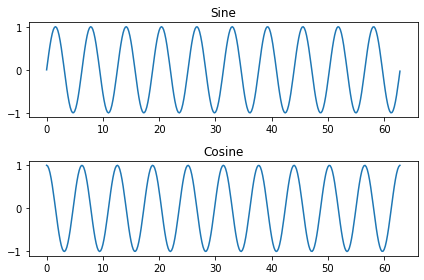

In [5]:
# Plot sin and cos on the same graph, using matplotlib
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 20 * np.pi, 0.2) 

y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  

# Ensure tight layout
plt.tight_layout()
   
# Show the figure. 
plt.show()